In [53]:
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
    
def genperate_data(staNum):    
    start   = dt.datetime(2019, int(month), 1) # Start from this date
    
    try:
        end     = dt.datetime(2019, int(month), 31)
    except:
        end     = dt.datetime(2019, int(month), 30)
        
    intval  = end -start
    dataNum = intval.days
    Counter = np.zeros(dataNum + 1)
    dayIndex = pd.date_range(start,end)
    df_Counter = pd.DataFrame({'TimeStamp': dayIndex, 'freq': Counter})
    df_Counter = df_Counter.set_index('TimeStamp')
    
    # The format of the txt file is
    #  time = 20190601000745
    #  time = 20190601001745
    #  time = 20190601002745
    #  time = 20190601003745
    #  time = 20190601004745
    #  time = 20190601005745
    #  ....... etc.
    
    # fidName = "C:/Users/gtra389/Desktop/HL_" + staNum + ".txt"
    fidName = "C:/Users/gtra389/Desktop/XT_" + staNum + "_"+ month + ".txt"
    df_MeasSeries = pd.read_table(fidName, header=None, sep = "=")
    df_MeasSeries.dropna(inplace = True)
    df_MeasSeries = df_MeasSeries.drop(0,axis = 1)
    df_MeasSeries.columns = ["Col1"]   
    df_MeasSeries["Col1"] = df_MeasSeries.astype(str) 

    df_MeasSeries["Col2"] = df_MeasSeries["Col1"].str[0:8] # Format: YYYYMMDD
    df_MeasSeries['Time'] = df_MeasSeries['Col1'].str[8:14]# Format: hhmmss
    df_MeasSeries.drop('Col1', axis=1, inplace=True)
    df_MeasSeries = df_MeasSeries.set_index(pd.to_datetime(df_MeasSeries["Col2"],format = '%Y%m%d'))
    df_MeasSeries.drop('Col2', axis=1, inplace=True)
    df_MeasSeries.index.name = "Date"
    
    tempCounter = 0
    for jj in range (len(df_Counter)):    
        for ii in range(len(df_MeasSeries)):
            if (df_MeasSeries.index[ii] == df_Counter.index[jj]):
                tempCounter += 1
        df_Counter.freq[jj] = tempCounter
        tempCounter = 0

    data = df_Counter.freq    
    dates = [start + dt.timedelta(days=i) for i in range(dataNum + 1)]
    return dates, data

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1
 
    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar
 
def calendar_heatmap(ax, dates, data, staNum):
    i, j, calendar = calendar_array(dates, data)
    cmapCus = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","red","yellow","green"])
    im = ax.imshow(calendar, interpolation='none', cmap= cmapCus)
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    #ax.figure.colorbar(im)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.05)
    plt.colorbar(im, cax=cax)
    im.set_clim(0, 1440)
    ax.set_title('XT ' + staNum + ' (1440 samples / day)',y = 1.1, fontsize= 14)

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]
 
    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')
 
    ax.set(xticks=np.arange(7),
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.xaxis.tick_top() 
    
def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90) 


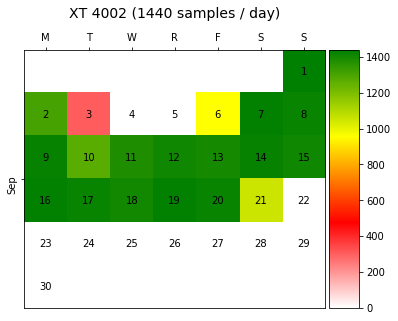

In [58]:
staNum = "4002"
month  = "9"
dates, data = genperate_data(staNum)
fig, ax = plt.subplots(figsize=(6, 10))
calendar_heatmap(ax, dates, data, staNum)
plt.savefig('heatmap_calendar_'+ staNum + "_"+ month +'.jpg', dpi=300)
plt.show()